# Data Manipulation with Pandas
- provides an efficient implementation of a Dataframe
- A dataframe is a multidimensional array with attached row and column labels
- often with heterogeneous types and/or missing data

In [ ]:
import pandas
pandas.__version__

In [ ]:
# we generally import pandas as pd
import pandas as pd
import numpy as np

## Pandas Objects
Can be thought of as enhanced bersions of NumPy structed arrays where rows and columns are identified with labels rather than simple integer indices.

Lets examine the fundamental Pandas data structures:
- Series
- DataFrame
- Index

### The Pandas Series Object
- A 1-d array of indexed data.
- Wraps both a sequence of values and sequence of indices
- Can be accessed with the values and index attributes.

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

In [ ]:
# values are a numpy array
data.values

In [ ]:
# index is an array-like object of type pd.Index
data.index

In [ ]:
# Data can be access with square-bracket notation
data[1]

In [ ]:
data[1:3]

In [ ]:
# Series' index has explicitly defined indexs.
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index=['a','b','c','d'])
data

In [ ]:
# Which can be accessed as
data['b']

In [ ]:
# We can use non-contiguous or non-sequential indices:
data = pd.Series([0.25,0.5,0.75,1.0],
                index=[2,5,3,7])
data

In [ ]:
data[5]

#### Series as a specialized dictionary
-  a structure which maps typed keys to a set of typed values

In [ ]:
population_dict = {'California': 23534,
                  'Texas': 346457,
                  'New York': 785643,
                  'Florida': 876543,
                  'Illinois': 1234576}
population = pd.Series(population_dict)
population

In [ ]:
# By default, the index is drawn from the sorted keys 
population['California']

In [ ]:
# Supports array-style slicing
population['California':'Illinois']

In [ ]:
#### Constructing Series Objects

In [ ]:
# From a list or numpy array
pd.Series([2,4,6])

In [ ]:
# from a scalar to fill the specified index
pd.Series(5, index=[100,200,300])

In [ ]:
# From a dictionary
pd.Series({2:'a', 1:'b', 3:'c'})

In [ ]:
# From a dictionary, but only the specified keys
pd.Series({2:'a',1:'b',3:'c'}, index=[3,2])

## Pandas DataFrame Object
A DataFrame can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.

### DataFrame as a generalized NumPy array
- an analog of a 2d array with both flexible row indices and flixible column names.

In [ ]:
# contruct a new Series
area_dict = {'California': 23453, 'Texas': 3456, 'New York': 234503409, 'Florida': 23453634, 'Illinois': 2345342}
area = pd.Series(area_dict)
area

In [ ]:
# From before..
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)

# We can construct a single 2d object containing population info
states = pd.DataFrame({'population': population, 'area': area})
states

In [ ]:
# DataFrame has an index attribute to access index labels
states.index

In [ ]:
# It also has a column attribute to access the column labels
states.columns

### DataFrame as specialized dictionary
- maps column names to a Series of column data.

In [ ]:
states['area']

### Constructing DataFrame objects

In [ ]:
# DataFrame is a collection of Series objects. 
pd.DataFrame(population, columns=['population'])

In [ ]:
# Lists of dictionaries can be made into a DataFrame.
data = [{'a': i, 'b':2 * i}
       for i in range(3)]
pd.DataFrame(data)

In [ ]:
# PD will will missing values with NaN
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

In [ ]:
# Can be constructed from a dictionary of Series objects
pd.DataFrame({'population': population, 'area': area})

In [ ]:
# Can be constructed from a 2d array of data.
pd.DataFrame(np.random.rand(3, 2),
            columns=['foo', 'bar'],
            index=['a', 'b', 'c'])

In [ ]:
# Can be constructed from a structed array
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

In [ ]:
pd.DataFrame(A)

### The Pandas Index Object
- an immutable array, or ordered set

In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

In [ ]:
# Can retrieve values or slices
ind[1]

In [ ]:
ind[::2]

In [ ]:
# Has other attributes familiar from NumPy
print(ind.size, ind.shape, ind.ndim, ind.dtype)

In [ ]:
# Can't be modified by normal means
int[1] = 0

#### Index as an ordered set

In [ ]:
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])

In [ ]:
# intersection
indA & indB

In [ ]:
# union
indA | indB

In [ ]:
# symmetric difference
indA ^ indB

## Data indexing and selection
- Many of the same means of accessing and modifying values in Pandas as NumPy

In [ ]:
### Data selection in series
#### Series as a dictionary

In [ ]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index=['a', 'b', 'c', 'd'])
data

In [ ]:
data['b']

In [ ]:
# We can use dictionary-like python expressions and methods to examine keys/indices and values
'a' in data

In [ ]:
data.keys()

In [ ]:
list(data.items())

In [ ]:
# modify values
data['e'] = 1.25
data

#### Series as a 1d array

In [ ]:
# slicing by explicit index
data['a':'c']

In [ ]:
# slicing by implicit integer index
data[0:2]

In [ ]:
# masking
data[(data > 0.3) & (data < 0.8)]

In [ ]:
# fancy indexing
data[['a', 'e']]

#### Indexers: loc, iloc, ix

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1,3,5])
data

In [ ]:
# explicit index when indexing
data[1]

In [ ]:
# implicit index when slicing
data[1:3]

In [ ]:
# indexing and slicing with loc always uses explicit index
data.loc[1]

In [ ]:
data.loc[1:3]

In [ ]:
# iloc allows indexing and slicing with implicit index
data.iloc[1]

In [ ]:
data.iloc[1:3]

### Data Selection in DataFrame
#### DataFrame as a dictionary
- lets consider the dataframe as a dictionary of related Series objects

In [ ]:
area = pd.Series({'Califonia':23454523, 'Texas': 23445, 'New York': 23890490, 'Florida': 23890450, 'Illinois': 2348035890})
pop = pd.Series({'Califonia':254523, 'Texas': 234453, 'New York': 238904, 'Florida': 290450, 'Illinois': 2348035})
data = pd.DataFrame({'area':area, 'pop': pop})
data

In [ ]:
# Individual series make up the columns can be accessed via dictionary style indexing of the column name
data['area']

In [ ]:
# We can also use attributes
data.area

In [ ]:
# it's the same thing 
data.area is data['area']

In [ ]:
# We can add data to dataframes
data['density'] = data['pop'] / data['area']
data

In [ ]:
#### DataFrame as a 2d array
data.values

In [ ]:
# We can transpose the data
data.T

In [ ]:
# Get a row
data.values[0]

In [ ]:
# get a column
data['area']

In [ ]:
# We can use iloc indexer to access data, maintaining dataframe index and column lavels
data.iloc[:3, :2]

In [ ]:
# loc indexer can be used with explicit index and coluimn names
data.loc[:'Illinois', :'pop']

In [ ]:
# ix index is a hybrid approach
data.ix[:3, :'pop']

In [ ]:
# We can use loc for masking and fancy indexing
data.loc[data.density > 10, ['pop', 'density']]

In [ ]:
# We can modify data with them too
data.iloc[0, 2] = 90
data

#### Additional indexing conventions
- index refers to columns
- slicing refers to rows

In [ ]:
data['Florida':'Illinois']

In [ ]:
# We can also refer to them as numbers
data[1:3]

In [ ]:
# Direct masking operations are row-wise
data[data.density > 10]

## Operation on Data in Pandas
- can perform numpy element-wise operations
- pandas keeps context when performing operations

### Ufuncs: index preservation

In [ ]:
import pandas as pd
import numpy as np

# define a series
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

In [ ]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                 columns=['A', 'B', 'C', 'D'])
df

In [ ]:
# applying a NumPy ufunc on either of these object will result in another pandas object with the indices preserved
np.exp(ser)

In [ ]:
# something more complicated
np.sin(df * np.pi / 4)

### UFuncs: Index Alignment
- for binary operations on 2 series or dataframe object, pandas will align indices. 
- this is useful when working with incomplete data

#### Index alignment in Series
- Lets combine 2 different data sources and find only the top 3 us states by area, and the top 3 states by population

In [ ]:
area = pd.Series({'Alaska': 123234, 'Texas': 234523,
                 'California': 457623}, name='area')
population = pd.Series({'Texas': 234523, 'California': 457623,
                'New York': 24523}, name='population')

In [ ]:
# calculate population density
population / area

In [ ]:
# The resulting array contains the unioni of indices.
# Could be found with
area.index | population.index

In [ ]:
# NaN is the default
A = pd.Series([2,4,6], index=[0,1,2])
B = pd.Series([1,3,5], index=[1,2,3])
A + B

In [ ]:
# We can fill NaN with another number
A.add(B, fill_value=0)

#### Index Alignment in DataFrame
- similar alignment happens for dataframe on both row and column

In [ ]:
A = pd.DataFrame(rng.randint(0, 20, (2,2)), columns=list('AB'))
A

In [ ]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('BAC'))
B

In [ ]:
A + B

In [ ]:
# We can also fill values
# lets use the mean value of A, computed by stacking rows of A
fill = A.stack().mean()
A.add(B, fill_value=fill)

### Ufuncs: operations between dataframe and series
- column alignment is maintained in these cases as well

In [ ]:
# find the difference of a 2d array and one of it's rows
A = rng.randint(10, size=(3,4))
A

In [ ]:
A - A[0]

In [ ]:
# with a dataframe
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

In [ ]:
# now column-wise
df.subtract(df['R'], axis=0)

In [ ]:
# Automatic index alignment takes place
halfrow = df.iloc[0, ::2]
halfrow

In [ ]:
df - halfrow

## Handling Missing Data
- often, data will be missing from sources
- Lets learn how to represent this
- We will refer to missing data as:
    - null
    - NaN
    - NA

### Trade-offs in missing data conventions
- we can use a mask that globally indicates missing values
    - may use a bool array
    - or a bit in data represenation to indicate null status
    - additional overhead in both storage and computation
- or we can choose a sentinel value
    - may indicate using -9999 or some rate bit pattern
    - or NaN
    - require extra logic in CPU and GPU arithmetic
    - NaN may not be available for the data-type
   
### Missing Data in Pandas
- because of reliance on numpy, there is no built in notion of NA values for non-floating point data types
- Following R's strategy is unwieldly because of the many datatypes
- Pandas uses sentinels for missing data:
    - NaN
    - None
- tends to be a good compromise

#### None: Pythonic missing data
- a python singleton object that is often used for missing data
- can only be used in arrays with datatype `object`

In [ ]:
import numpy as np
import pandas as pd

vals1 = np.array([1, None, 3, 4])
vals1

# object is the best common type
# operations will be performed at python level

In [ ]:
# Operations are slower with this type
for dtype in ['object', 'int']:
    print('dtype =', dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

In [ ]:
# aggregations of python objects will result in an error
vals1.sum()

#### NaN: Missing numberical data
- a special floating-point value

In [ ]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

# numpy choses floating point for this array

In [ ]:
# NaN operations will result in NaN
1 + np.nan

In [ ]:
0 * np.nan

In [ ]:
# aggregations wont result in errors but aren't very useful
vals2.sum(), vals2.min(), vals2.max()

In [ ]:
# There are special aggregations that ignore NaN
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

#### NaN and None in pandas
- both have their place
- pandas will convert where appropriate

In [ ]:
pd.Series([1, np.nan, 2, None])

In [ ]:
# Pandas will type-case when NA values are present
x = pd.Series(range(2), dtype=int)
x

In [ ]:
x[0] = None
x

### Operating on Null values
- there are many methods for detecting, removing, and replacing null values
- isnull(): generate a boolean mask indicating missing values
- notnull(): opposite of isnull()
- dropna(): return filter version of the data
- fillna(): return a copy of the data with missing values filled or imputed

#### Detecting null values
- lets get a mask for all null values or nonnull values

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

In [ ]:
data[data.notnull()]

#### Dropping null values

In [ ]:
data.dropna()

In [ ]:
df = pd.DataFrame([[1, np.nan, 2],
                  [2, 3, 5],
                  [np.nan, 4, 6]])
df

In [ ]:
# Drop all rows in which any null value is present
df.dropna()

In [ ]:
# drop columns containing a null value
df.dropna(axis="columns")

In [ ]:
df[3] = np.nan
df

In [ ]:
# drop columns where all values are null values
df.dropna(axis='columns', how='all')

In [ ]:
# keep rows where a min number of non-null values are
df.dropna(axis='rows', thresh=3)

#### Fililng null values
- sometimes you may want to fill a null value with something that makes sense for the dataset

In [ ]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

In [ ]:
# fill null with 0
data.fillna(0)

In [ ]:
# forward-fill to propagate the previous value forward
data.fillna(method='ffill')

In [ ]:
# back-fill to propagate the next values backward
data.fillna(method='bfill')

In [ ]:
df

In [ ]:
# forward-fill a dataframe by specficing the axis
df.fillna(method='ffill', axis=1)

# null values remain if there is no previous value

## Hierarchical Indexing
- When we need to index at higher dimensions, we can use hierarchical indexing.
- This incorporates multiple index levels within a single index
- We will explore MultiIndex objects

In [ ]:
import pandas as pd
import numpy as np

### Multiple Indexed Series
- Lets consider representing 2d data in a 1d series.

#### Pandas MultiIndex

In [ ]:
index = [('California', 2000), ('California', 2010), ('New York', 2000), ('New York', 2010), ('Texas', 2000), ('Texas', 2010)]

index = pd.MultiIndex.from_tuples(index)
index

# Contains multiple levels of indexing and multiple labels per datapoint

In [ ]:
populations = [23423454, 345345,
              2342341, 678768,
              643278, 34565677]
pop = pd.Series(populations, index=index)
pop = pop.reindex(index)
pop

# The first 2 columns show labels and the last shows data
# Missing values means that it's the same as the value the row above

In [ ]:
# access all data which the second index is 2010
pop[:, 2010]

#### MutliIndex as extra dimension
- We can use the unstack method to quickly convert a multi indexed Series into a DataFrame

In [ ]:
pop_df = pop.unstack()
pop_df

In [ ]:
# To convert from a dataframe to a mutliindex Series
pop_df.stack()

In [ ]:
# add another column of data
pop_df = pd.DataFrame({'total': pop,
                      'under18': [2346345,234245234,
                                 36341435,23452453,
                                 234234235,34563453]})
pop_df

In [ ]:
# Compute the fraction of people unser 18 by year
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

### Methods of MultiIndex Creation

In [ ]:
df = pd.DataFrame(np.random.rand(4,2),
                 index=[['a','a','b','b'], [1,2,1,2]],
                 columns=['data1','data2'])
df

In [ ]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

#### Explicit MultiIndex Constructors

In [ ]:
# From arrays
pd.MultiIndex.from_arrays([['a','a','b','b'], [1,2,1,2]])

In [ ]:
# From a list of tuples
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

In [ ]:
# From a cartesian product of single indices
pd.MultiIndex.from_product([['a','b'], [1,2]])

In [ ]:
# From internal encodings
pd.MultiIndex(levels=[['a','b'], [1,2]],
             labels=[[0,0,1,1], [0,1,0,1]])

### MultiIndex level names
We can push a names argument to give labels

In [ ]:
pop.index.names = ['states', 'year']
pop

### MultiIndex for columns
- Columns can have multiple levels as well

In [ ]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013,2014], [1,2]],
                                  names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob','Guido','Sue'], ['HR','Temp']],
                                    names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4,6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame 
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

In [ ]:
health_data['Guido']

### Indexing and slicing a multiindex
#### Multiply indexed series
- Consider the Series of state populations

In [ ]:
pop

In [ ]:
# Access single elements by indexing with multiple terms
pop['California', 2000]

In [ ]:
# Access just 1 level with partial indexing
pop['California']

In [ ]:
# Use Partial sorting on a sorted MultiIndex
pop.loc['California': 'New York']

In [ ]:
# Use partial index on lower levels
pop[:, 2000]

In [ ]:
# selection with boolean mask
pop[pop > 2300000]

In [ ]:
# Selection based on fancy indexing
pop[['California', 'Texas']]

#### Multiply Indexed DataFrames

In [ ]:
health_data

In [ ]:
# Get Guido's heart rate data
health_data['Guido','HR']

In [ ]:
# We can do the same with iloc, loc, ix
health_data.iloc[:2, :2]

In [ ]:
# loc and iloc can be passed a tuple of multiple indices
health_data.loc[:, ('Bob', 'HR')]

In [ ]:
# Get a slice with IndexSlice
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

### Rearranging Multi-indices
- sometimes we need to rearrange the data for computation

#### Sorted and unsorted indices
- many multiindex slicing operations will fail if the index is not sorted

In [ ]:
# create a non-lexographically sorted dataset
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1,2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

In [ ]:
# if we try to take a partial slice with this it will produce an error
try:
    data['a': 'b']
except KeyError as e:
    print(type(e))
    print(e)

In [ ]:
# sort the index 
data = data.sort_index()
data

In [ ]:
data['a':'b']

#### Stacking and unstacking indices
- convert a dataset

In [ ]:
pop.unstack(level=0)

In [ ]:
pop.unstack(level=1)

#### Index setting and resetting
- we can turn index levels into columns

In [ ]:
pop_flat = pop.reset_index(name='population')
pop_flat

In [ ]:
# it can be useful to convert flat data into a multiindex
pop_flat.set_index(['states', 'year'])

### Data Aggregations on Mutli-Indices
- mean(), sum(), and max() can be passed a level index to determine how to aggregate data

In [ ]:
health_data

In [ ]:
# average out measurements of the visits
data_mean = health_data.mean(level='year')
data_mean

In [ ]:
# Take mean amoung columns
data_mean.mean(axis=1, level='type')

## Combining Datasets: Concat and Append
- It's important to know how to combine data sources and handle overlaps
- lets look at how to combine Series and DataFrames

In [ ]:
import pandas as pd
import numpy as np

# Define a dataframe
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
           for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

In [ ]:
# Define a function to render multiple dataframes side by side
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}</div>"""
    
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                        for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                          for a in self.args)

### Recall: Concatentation of NumPy Arrays
- Concat of Series and DataFrame objects similar to NumPy arrays.

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]

np.concatenate([x, y, z])

In [ ]:
# We can specify the axis along which the result will be concat
x = [[1, 2], 
    [3, 4]]
np.concatenate([x, x], axis=1)

### Simple Concatenation with pd.concat
- pd.concat() is similar to np.concatenate()

In [ ]:
# concat 2 series
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

In [ ]:
# Also works on Dataframes
# works axis=0 be default
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

In [ ]:
# concat along col
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

### Duplicate Indices
- Pandas preserves indices

In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

In [ ]:
# Catch repeats as an error
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print('ValueError:', e)

In [ ]:
# Ignore the index
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

In [ ]:
# Adding Multiindex keys
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

### Concatenation with joins
- we may need to join data that does not have the same column names

In [ ]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

# outer join be default
display('df5', 'df6', 'pd.concat([df5, df6])')

In [ ]:
# use an inner join
display('df5', 'df6',
       "pd.concat([df5, df6], join='inner')")

In [ ]:
# specify which columns to keep
display('df5', 'df6',
       "pd.concat([df5, df6], join_axes=[df5.columns])")

## Append()
- a shorthand

In [ ]:
display('df1', 'df2', 'df1.append(df2)')

## Combining Datasets: Merge and Join
- pandas offers high-performance, in-memory join and merge operations

In [ ]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Relational Algebra
- pd.merge() is a subset of relational algebra
- this is a formal set of rules for manipulating relational data and forms the conceptual fondation of operations for most databases

### Categories of Joins
- There are 3 categories of joins:
 - one-to-one
 - many-to-one
 - many-to-many
 
#### One-to-one joins

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                   'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

In [ ]:
# combine into a single dataframe
df3 = pd.merge(df1, df2)
df3

### Many-to-one joins
- when one of the 2 key columns contains duplicate entries
- the resulting dataframe will preserve those duplicate entries

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                   'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

### Many-to-many joins
- if the key columns in both the left and right array contains duplicates, then the result is a many-to-many merge

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 
                             'Engineering', 'Engineering', 'HR', 'HR'],
                   'skills': ['math', 'spreadsheets', 'coding', 'linux',
                             'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

### Specification of the Merge key
- default behavior of pd.merge() is to look for one or more matching column names and use this as the key
- we may want a different behavior

#### The on keyword
- specify the name of the key column
- takes a name or a list of names

In [ ]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

#### The left_on and right_on keywords
- sometimes we need to merge datasets with different column names

In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

In [ ]:
# we can drop redundant columns
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

#### The left_index and right_index keywords
- we can merge on an index

In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

In [ ]:
# use index as a key for merging
display('df1a', 'df2a', "pd.merge(df1a, df2a, left_index=True, right_index=True)")

In [ ]:
# join merges on indices
display('df1a', 'df2a', 'df1a.join(df2a)')

In [ ]:
# Mix indices and columns
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

### Specifying Set Arithmetic for Joins
- We need to consider when a value in the key column is not in the other

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                   'food': ['fish', 'beans', 'bread']},
                  columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                   'drink': ['wine', 'beer']},
                  columns=['name', 'drink'])

# This is an inner join where only the interaction is kept
display('df6', 'df7', 'pd.merge(df6, df7)')

In [ ]:
# also an inner
pd.merge(df6, df7, how='inner')

In [ ]:
# Outer - union over input columns and fills the missing values
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

In [ ]:
# left joins over left entries
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

### Overlapping Column Names: The suffixes keyword
- You may input 2 dataframes with conflicting column names

In [ ]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

In [ ]:
# use custom suffixes
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

### Example: US States Data
- lets consider different sources of data about the US states and their populations

In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

In [ ]:
# look at the three datasets using the pandas read_csv()
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

In [ ]:
# We wnat to rank US states and terrietoris by their 2010 population density
# First we need to combine the datasets
# First we use a many-to-one merge to get the full state name
# Do this with the state/region column of pop and the abbrevation column of abbrevs.
# Use an other join to make sure no data is thrown away due to mismatched labels
merged = pd.merge(pop, abbrevs, how='outer',
                 left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

In [ ]:
# Check for mismatches by looking for rows with null
merged.isnull().any()

In [ ]:
# Some of the population info is null, lets find it
# puerto rico data is null before the year 2000
merged[merged['population'].isnull()].head()

In [ ]:
# Some state entries are null, which means there are no corresponding entry in abbrevs key
merged.loc[merged['state'].isnull(), 'state/region'].unique()

In [ ]:
# It seems that there is no abbreviation key for PR and USA
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

In [ ]:
# now lets merge the area data
# We want to join on the state column
final = pd.merge(merged, areas, on='state', how='left')
final.head()

In [ ]:
# Check for mismatches
final.isnull().any()

In [ ]:
# there are nulls in the area column
# check which regions were ignored
final['state'][final['area (sq. mi)'].isnull()].unique()

In [ ]:
# Ok, lets drop United States since it's not relevent
final.dropna(inplace=True)
final.head()

In [ ]:
# Select the portion of data for the year 2000 and the total pop
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

In [ ]:
# Now compute density and order it. 
# First reindex data on state
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [ ]:
density.sort_values(ascending=False, inplace=True)
density.head()

In [ ]:
density.tail()

## Aggregation and Grouping

In [ ]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Planets Data
- download exoplanet data

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

In [ ]:
# Details of 1000+ exoplanets up to 2014
planets.head()

### Simple Aggregation in Pandas

In [ ]:
# Series agg
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

In [ ]:
ser.sum()

In [ ]:
ser.mean()

In [ ]:
# Dataframe agg
df = pd.DataFrame({'A': rng.rand(5),
                  'B': rng.rand(5)})
df

In [ ]:
df.mean()

In [ ]:
# aggregate on row
df.mean(axis='columns')

In [ ]:
# Describe can be used to compute several common aggs
planets.dropna().describe()

Shows that the firs planet discovered was in 1989  
Half of all known discovered 2010 or after

### GroupBy: Split, Apply, Combine
- splits the data on a value of the specified key
- applys computation
- combines the data into an output array

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                  'data': range(6)}, columns=['key', 'data'])
df

In [ ]:
df.groupby('key')

In [ ]:
# apply an aggregate on the DataFrameGroupBy object
df.groupby('key').sum()

### GroupBy object
- allows us to abstract the groupby function
- some of the most important operations of it are:
    - aggregate
    - filter
    - transform
    - apply

#### Column Indexing
- GroupBy supports column indexing the same way as the DataFrame then returns a GroupBy object

In [ ]:
planets.groupby('method')

In [ ]:
# Select a particular Series group from the original DataFrame group by referencing it's column name
planets.groupby('method')['orbital_period']

In [ ]:
# Run an aggregate operation
# Gives us a general scale of orbital periods in days that each method is sensitive to
planets.groupby('method')['orbital_period'].median()

#### Iteration over grouops
- GroupBy supports direct iteration over groups.
- Returns each group as a Series or DataFrame

In [ ]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

#### Dispatch Methods
- any method not explicitly implemented by the GroupBy object will pass through and call on the groups

In [ ]:
# looking at this table, we see that the majority of planets have been discovered by Radial Velocity and Transit methods
# some were only used in recent years
planets.groupby('method')['year'].describe().unstack()

### Aggregate, filter, transform, apply
- allows for effcient implementation of useful operations before combining the grouped data

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                  'data1': range(6),
                  'data2': rng.randint(0, 10, 6)},
                 columns = ['key', 'data1', 'data2'])
df

#### Aggregation
- apply multiple aggregations

In [ ]:
df.groupby('key').aggregate(['min', np.median, max])

In [ ]:
# it can be useful to pass a dictionary mapping column names to operations applied
df.groupby('key').aggregate({'data1': 'min',
                            'data2': 'max'})

#### Filtering
- allows you to drop data based on the group properties

In [ ]:
# We may want to keep all gorups in which the standard deviation is larger than some critical value
def filter_func(x):
    return x['data2'].std() > 4

# Return data only if that key's std in column 2 is greater than 4
display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

#### Transform
- can return some transformed version of the full data to recombine
- a common example is to center the data by subtracting the group-wise mean

In [ ]:
df.groupby('key').transform(lambda x: x - x.mean())

#### The apply() method
- lets you apply an arbitrary function to the group results
- the function should take a Dataframe
- it should return a Pandas object or scalar

In [ ]:
# normalize the first column by the sum of the second
def norm_by_data2(x):
    # x is a DataFrame from group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

### Specifying the split key
- there are many ways to split a DataFrame

#### A list, array, series, or index providing the grouping keys
- a key can be a sereis or list with a length matching that of the dataframe

In [ ]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

In [ ]:
# instead of df.groupby('key'), we can:
display('df', "df.groupby(df['key']).sum()")

#### A dictionary or sereis mapping index to group

In [ ]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

#### Any Python Function
- the input should be an index
- the output should be a group

In [ ]:
display('df2', 'df2.groupby(str.lower).mean()')

#### A list of valid keys
- any preceeding key choices can be combined to group on a multi-index

In [ ]:
df2.groupby([str.lower, mapping]).mean()

### Grouping Example
- count discovered planets by method and by decade

In [ ]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

## Pivot Tables
- takes simple column-wise data as input
- groups entries into a 2d table that provides multi-d summerization of the data
- is a multidimensional version of GroupBy aggregation

### Motivating Pivot Tables
- lets use passengers on the titanic as an example

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

titanic.head()

### Pivot Tables by hand
- we might group data according to gender, survival, or some combo

In [ ]:
# Survival rate by geneder
titanic.groupby('sex')[['survived']].mean()

In [ ]:
# Lets look at survival by sex, and class
# first group by class and gender
# select survival
# Apply a mean aggregate
# combine the resulting groups
# unstack to reveal hidden multidimensionality
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

### Pivot Table Syntax
- lets look at an equavilant operation to the previous

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class')

### Multi-level pivot tables
- What if we want to look at age as a third dimension

In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

In [ ]:
# add in data for fare paid
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

### Additional pivot table options
- there is also the fill_value and dropna options
- they specify what to do with missing data, and what not to show
- aggfunc controls the type of aggregation applied
- mean is the default
- we can also specify a diction mapping a column to an aggregation

In [ ]:
titanic.pivot_table(index='sex', columns='class',
                   aggfunc={'survived': sum, 'fare': 'mean'})

In [ ]:
# We can compute totals amoung groups
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

### Example: Birthrate Data
- Lets look at births in the US
- provided by Centers for Disease Control

In [ ]:
# shell command to download the data:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [ ]:
births = pd.read_csv('data/births.csv')
births.head()

In [ ]:
# lets add a decade column and look at males and female births as a function of it
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

In [ ]:
# Lets visualize this
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [ ]:
# Lets remove outliers caused by mistyped dates and missing values
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [ ]:
# This line is for a robust estimate of the sample mean.
# 0.74 comes from interquatile range of a Gaussian distrivution
# lets use a query method to filter out rows outside these values
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [ ]:
# Set the day column to integers
# null values made it a string datatype previously
births['day'] = births['day'].astype(int)

In [ ]:
# Lets combine the day, month, and year to create a data index
# allows us to quickly compute the weekday
births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month +
                             births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [ ]:
# lets plot births by weekday for several decades
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                  columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [ ]:
# looks like it's slightly more common to be born on a weekday than weekend
# 1990s and 2000s are missing cause only month of births are recorded starting 1989

In [ ]:
# Lets look at the mean number of briths by the day of the year
# Lets group by month and day seperately
births_by_date = births.pivot_table('births',
                                   [births.index.month, births.index.day])
births_by_date.head()

In [ ]:
# This results in a mutli-index set
# lets turn them into a date using a dummy year
# handle the leap year!
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]
births_by_date.head()

In [ ]:
# now we have a time series reflecting the average number of births by date of thyear
# lets plot
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

In [ ]:
# note the dip on US holidays. This is likely because of induced for scheduled births

## Vectorized String Operations
- python provides relative ease for handling and manipulating string data
- Pandas builds on it with vectorized string operations

### Pandas String Operations

In [ ]:
# We was numpy arithmetic ops
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

In [ ]:
# numpy doesn't provide vectorized string operations
data = ['peter', 'Paul', 'MARY', 'gUDIO']
[s.capitalize() for s in data]

In [ ]:
# missing values will break this
data = ['peter', 'Paul', None, 'MARY', 'gUDIO']
[s.capitalize() for s in data]

In [ ]:
# pandas can handle these issues
import pandas as pd
names = pd.Series(data)
names

In [ ]:
# We can call capitalize on all entires and skip missing values
names.str.capitalize()

### Table of Pandas String Methods

In [ ]:
# lets use the following Pandas Series for this section
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                  'Eric Idle', 'Terry Jones', 'Michael Palin'])

#### Methods similar to Python string methods
- there is a set of pandas mirrored string methods

In [ ]:
# lower case strings
monte.str.lower()

In [ ]:
# Length of strings
monte.str.len()

In [ ]:
# Starts with a letter
monte.str.startswith('T')

In [ ]:
# Split the string
monte.str.split()

#### Methods using regular expressions
- there are several methods that accept regular expressions to examine the content of each string element

In [ ]:
# Extract the first name by asking for a contigous group of characters at the meginning of each element
monte.str.extract('([A-Za-z]+)', expand=False)

In [ ]:
# Find all names that start and end with a consonant
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

### Miscellaneous methods
- There are many other useful methods

#### Vectorized item access and slicing
We can use the get and slice operations to access elements from the array

In [ ]:
monte.str[0:3]

In [ ]:
# Extract the last name of each entry
monte.str.split().str.get(-1)

#### Indicator variables
- get_dummies is useful when a column has a coded indicator
- this could be A='born in America', B='born in the United Kingdom'

In [ ]:
full_monte = pd.DataFrame({'name': monte,
                          'info': ['B|C|D', 'B|D', 'A|C',
                                  'B|D', 'B|C', 'B|C|D']})
full_monte

In [ ]:
# Get_dummies splits-out these indicator vars into a dataframe
full_monte['info'].str.get_dummies('|')

### Example: Recipe Database
- Lets clean up some data
- Data will come from an open recipe database
- We want to parse the data into ingredient lists as we can find a recipe based on ingredients

In [ ]:
# !curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz
# !gunzip recipeitems-latest.json.gz

In [ ]:
# This database is in JSON
try: 
    recipes = pd.read_json('data/recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

In [ ]:
# Getting a trailing data error means that each line is JSON but the full file isn't
# lets check if this is true
with open('data/recipeitems-latest.json') as f:
    line = f.readline()
    line = line.split('\n')
    line = eval(line[0])
line
# pd.read_json(line).shape

In [ ]:
# we need to string them together then load it
# Read file into a python array
with open('data/recipeitems-latest.json', 'r') as f:
    # extract each line
    data = (line.strip() for line in f)
    data = (line.split('\n') for line in f)
    data = (line[0] for line in data)
    # Reformat so each line is the leement of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as JSON
recipes = pd.read_json(data_json)

In [ ]:
recipes.shape

In [ ]:
# lets look at 1 row
recipes.iloc[0]

In [ ]:
# look at the ingredients
recipes.ingredients.str.len().describe()

In [ ]:
# What's the longest ingredients list?
recipes.name[np.argmax(recipes.ingredients.str.len())]

In [ ]:
# how many are breakfast foods?
recipes.description.str.contains('[Bb]reakfast').sum()

In [ ]:
# How many contain cinnamon
recipes.ingredients.str.contains('[Cc]innamon').sum()

In [ ]:
# Do any misspell cinamon?
recipes.ingredients.str.contains('[Cc]inamon').sum()

In [ ]:
### A simple recipe recommender
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley', 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [ ]:
# build a dataframe of true/false values indicating if the ingredient appears
import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                            for spice in spice_list))
spice_df.head()

In [ ]:
# find a recipe with an ingredient
selection = spice_df.query('parsley & tarragon')
len(selection)

In [ ]:
# find the names of the recipes
recipes.name[selection.index]

## Working with Time series
- Pandas was developed in the context of financial modeling
- there are 3 flavours of time index data:
    - Time stamps: which reference a moment in time
    - Time intervals: reference the length of time between a given start and end
    - Time deltas: reference an exact length of time
        
### Date and Times in Python
#### Native Python dates and times
- you can manually build a datetime type

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
# We can use dateutil to parse dates from string formats
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
# we can use the datetime object to print the day of the week
date.strftime('%A')

'Saturday'

#### Typed Arrays of times: Numpy's datetime64
- encodes dates at 64-bit ints


In [4]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

In [5]:
# Can perform vectorize operations on it
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

In [6]:
# day based datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [7]:
# minute based datetime
# timezone set to local time on computer
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [8]:
# force nansecond-based time
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

#### Date and times in pandas
- provides a timestamp object
- pandas can construct a DatetimeIndex
- used in Series or Dateframe

In [9]:
# parse a string date and output day of week
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [10]:
date.strftime('%A')

'Saturday'

In [11]:
# Perform vectorer operations
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by time
- useful when indexing data by timestamps

In [12]:
# construct a Series object that has a time index
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                         '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [13]:
# use Series indexing
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [14]:
# We can get a slice of data based on a year
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures
- Timestamps: the Timestamp type is used for indexing via DatetimeIndex
- time periods: the Period type is a fixed frequency for indexing on the periodindex
- time deltas: the Timedelta type is for indexing on the TimedeltaIndex

In [15]:
# passing a date to pd.to_datetime() yields Timestamp.
# passing a series of dates yields a DatetimeIndex
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [16]:
# any DatetimeIndex can be converted to a PeriodIndex with to_period()
# 'D' indicates daily frequency
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [17]:
# TimedeltaIndex is created when a date is subtracted from another
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequences
- we can create a regular date sequence with several methods

In [18]:
# daily
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# using a starting point and periods
pd.date_range('2015-07-03', periods=9)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11'],
              dtype='datetime64[ns]', freq='D')

In [20]:
# we can change frequecy
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [21]:
# we can also create a regular sequency of periods
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [22]:
# or timedelts by hour
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets
- there are many codes we can use
- they can be used for offsets too

In [23]:
# create a business day offset
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Resampling, Shifting, and Windowing
- it's important to be able to reogranize data
- the pandas-datareader package can import financial data

In [47]:
# import google closing price history
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016', data_source='morningstar')
goog.head()

Close      High       Low      Open  Volume
Symbol Date                                                      
GOOG   2014-03-27  556.9312  566.4451  551.4064  566.4451   13087
       2014-03-28  558.4570  564.8794  557.1406  559.7136   41115
       2014-03-31  555.4453  565.4478  555.4054  565.3381   10801
       2014-04-01  565.6074  566.8939  557.1805  557.1805    7953
       2014-04-02  565.4478  603.1743  560.6510  579.1702  147099

In [62]:
# select the closing price
googClose = goog.reset_index(level=0, drop=True)
googClose = googClose['Close']
googClose

Date
2014-03-27    556.9312
2014-03-28    558.4570
2014-03-31    555.4453
2014-04-01    565.6074
2014-04-02    565.4478
2014-04-03    568.1803
2014-04-04    541.6531
2014-04-07    536.6768
2014-04-08    553.3810
2014-04-09    562.5957
2014-04-10    539.4691
2014-04-11    529.1475
2014-04-14    531.0622
2014-04-15    534.9715
2014-04-16    555.0165
2014-04-17    534.6324
2014-04-18    534.6324
2014-04-21    527.1729
2014-04-22    533.3459
2014-04-23    525.4975
2014-04-24    523.7224
2014-04-25    514.7669
2014-04-28    515.7343
2014-04-29    526.2554
2014-04-30    525.2183
2014-05-01    529.8954
2014-05-02    526.4848
2014-05-05    526.3651
2014-05-06    513.7298
2014-05-07    508.5640
                ...   
2015-11-23    755.9800
2015-11-24    748.2800
2015-11-25    748.1500
2015-11-26    748.1500
2015-11-27    750.2600
2015-11-30    742.6000
2015-12-01    767.0400
2015-12-02    762.3800
2015-12-03    752.5400
2015-12-04    766.8100
2015-12-07    763.2500
2015-12-08    762.3700
2015-1

In [63]:
# plot it out!
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


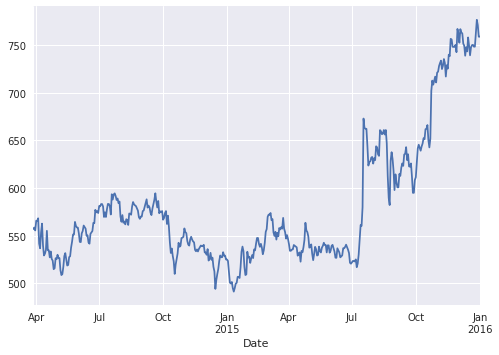

In [64]:
googClose.plot()

### Resampling and converting frequencies
- time series data is good for resampling at a higher or lower frequency
- resample is for data aggregation
- asfreq is for data selection

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


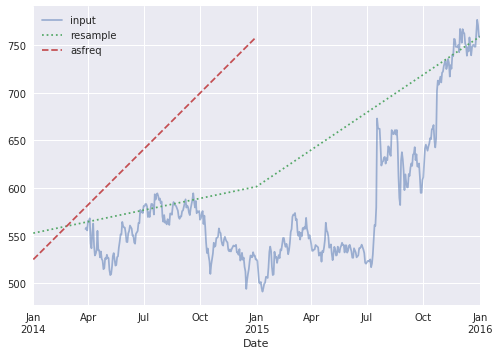

In [66]:
# lets compare what the two return when we down-sample the data
# resample the data at the end of the business year
googClose.plot(alpha=0.5, style='-')
googClose.resample('BA').mean().plot(style=':')
googClose.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


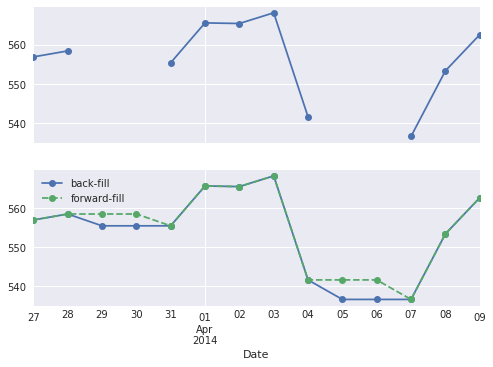

In [67]:
# resample reports the average of the previous year
# asfreq reports the vale at the end of the year
# lets resample the business day data at a daily frequency (including weekends)
fig, ax = plt.subplots(2, sharex=True)
data = googClose.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"])

In [ ]:
# the top panel is the default.
# non-business dats are NA values
# the bottom planel has a fill strategy

#### Time-shifts
- it is common to shift the data in time
- there is the shift and tshift methods
- shift: shifts the data
- tshift: shifts the index
- they are specified in multiples of the frequency

### Example: Visualizing Seattle Bicycle Count
- lets look at the bicycle count on Seattle's Fremont Bridge.
- it comes from an automatic sensor installed in late 2012. 
- it's an inductive sensor on the east and west side of the bridge

In [74]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1370k    0 1370k    0     0   472k      0 --:--:--  0:00:02 --:--:--  495k--  305k


In [77]:
# read the data into a DataFrame
# we want the Date as an index and it to be automatically parsed
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [78]:
# shorten the names and add a total column
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [79]:
# lets look at the summary
data.dropna().describe()

,West,East,Total
count,48856.000000,48856.000000,48856.000000
mean,54.440294,55.199218,109.639512
std,72.805279,79.947734,138.729253
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,59.000000
75%,71.000000,67.000000,143.000000
max,854.000000,717.000000,1165.000000


In [80]:
#### Visualizing the data
%matplotlib inline
import seaborn; seaborn.set()

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


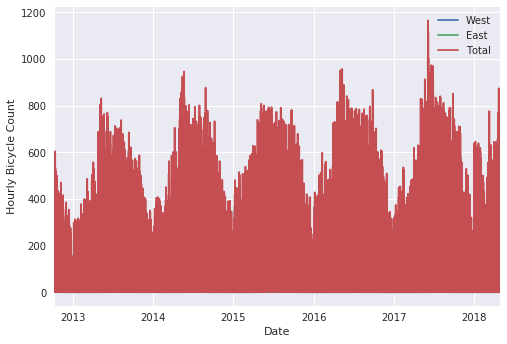

In [81]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


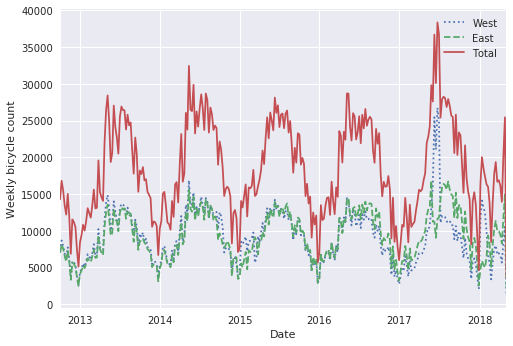

In [82]:
# the ~25000 samples is too dense for us to make sense of
# lets resample the data to a coarser gride
# resample by a week
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


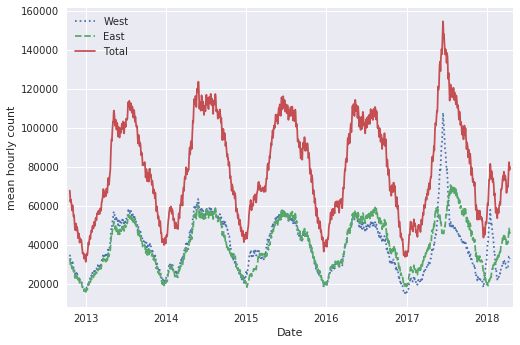

In [83]:
# we see seasonal trends as expected (winter / summer)
# even week to week (weather related)
# to aggregate the data, lets use a rolling mean
# do a 30 day rolling mean and center the window
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


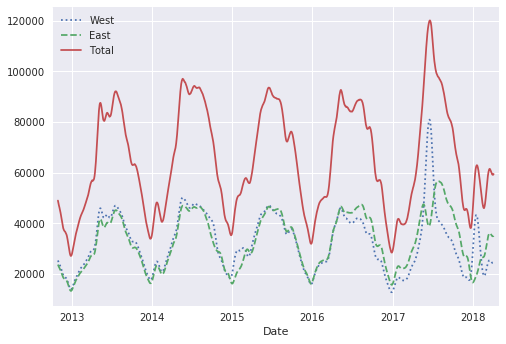

In [84]:
# the jaggedness is due to the hard cutoff of the window
# we can smooth it out with a gaussian window
# use a window width of 50 days
# with an inner gaussian window of 10 days
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

#### Digging into the data
- the smoothed data gives insight to the general trend
- it hides much of the interesting structure
- lets look at the average traffic as a function of the time of the day

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


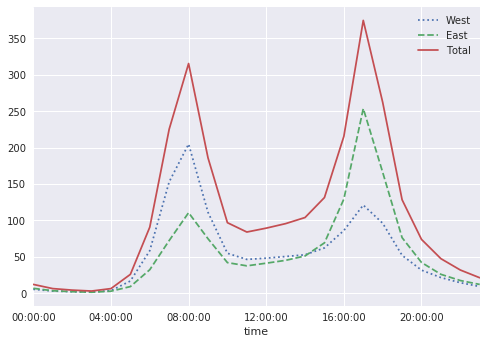

In [86]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

In [87]:
# this bimodal graph has peaks at 8am and 5 pm
# it is likely commuter traffic
# notice the sidewalk used, west twowards downtown seattle

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


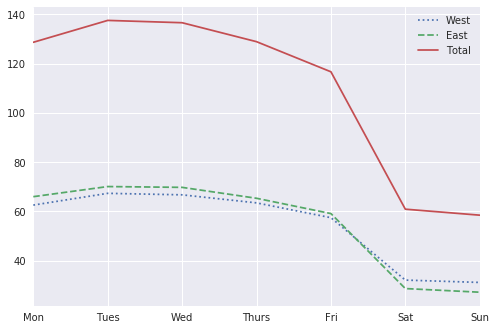

In [88]:
# lets examine how things change based on day of the week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [89]:
# as expected, weekday has higher usage
# Lets look at the hourly trend on weekday versus weekends
# group by a flag marking the weekend and time of day
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


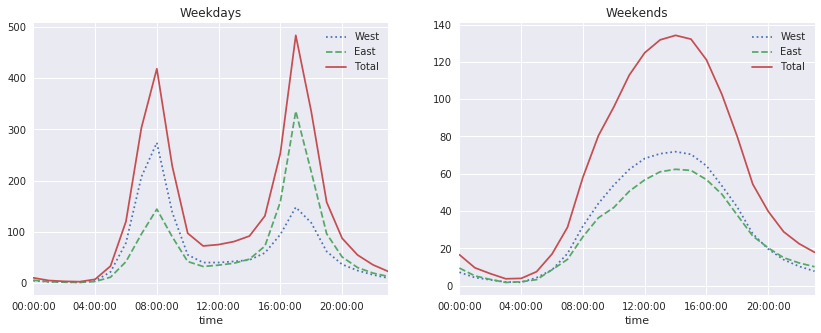

In [90]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title="Weekdays",
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title="Weekends",
                           xticks=hourly_ticks, style=[':', '--', '-'])

In [91]:
# we see the bimodal trend on weekdays = commuters
# and we see recreational riding that is unimodal during the weekends. RAD